<img src="./img/banner.png">

# Laboratorio 3 - AlpesGamesInsight

1. Carga y exploración de datos.

    1.1. Importación de librerias.
    
    1.2. Carga de datos.
    
    1.3. Exploración.
    
2. Limpieza y preparación de los datos.

    2.1. Tipo adecuado de cada atributo.
    
    2.2. Selección de atributos.
    
3. Búsqueda de relaciones entre variables (diagramas de dispersión).

4. Regresión básica.

5. Exportar e importar el modelo.

6. Coeficientes.

7. Métricas de un modelo.
    
    7.1. Coeficiente de Determinación  𝑅2.
    
    7.2. Root-Mean-Square Error (RMSE).
    
8. Supuestos de la Regresión Lineal.
    
    8.1. Colinealidad.
    
    8.2. Linealidad.

    8.3. Normalidad en los Errores.
    
    8.4. Varianza Constante (Homocedasticidad).

## 1. Carga y exploración de datos.

### 1.1. Importación de librerias.

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# modelos

#Librerías para la visualización
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

%matplotlib inline



### 1.2. Carga de datos.

In [2]:
# carga de los datos
# csv -> dataFrame
df_players = pd.read_csv('./data/SkillCraftHistoric.csv', sep=',', encoding = 'utf-8' )

### 1.3. Exploración.

In [3]:
#cantidad de datos y numero de variables
df_players.shape

(3238, 19)

In [4]:
# mostrar 5 filas al azar
df_players.sample(5)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
2485,5.336146,26,20,600,66.0696,0.001490313,0.0004657228,5,7.45156482861401e-05,5.58867362146051e-05,0.002608,23.5683,79.4857,4.3214,14,0.000876,4,0.0,0.0
2195,6.404559,20,42,1500,130.716,0.0047282481,0.0004503093,5,0.000323048,0.0009495654,0.004562,33.7462,50.4549,4.3047,23,0.000901,7,0.000117472,0.00059715
237,6.139810,20,2,150,107.1972,0.0007519857,8.22484372796917e-05,2,0.0,0.0003524933,0.004242,31.1111,49.0526,4.4515,25,0.000752,7,0.0002232458,0.00022325
2548,7.094874,19,28,2400,150.5922,0.0057436518,0.0008565095,2,0.0004030633,0.0009572753,0.003325,25.5198,65.3333,7.7394,22,0.001219,8,8.06126561870214e-05,0.0
2867,6.118696,17,4,1260,204.3654,0.006015471,0.0004927666,7,9.29748224180892e-05,0.0016363569,0.003691,18.5152,47.335,9.3778,26,0.001227,9,0.0001859496,0.00060434


In [5]:
# ver todos los tipos de variables 
df_players.dtypes

LeagueIndex             float64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                      object
SelectByHotkeys          object
AssignToHotkeys          object
UniqueHotkeys            object
MinimapAttacks           object
MinimapRightClicks       object
NumberOfPACs            float64
GapBetweenPACs           object
ActionLatency            object
ActionsInPAC            float64
TotalMapExplored         object
WorkersMade             float64
UniqueUnitsMade          object
ComplexUnitsMade         object
ComplexAbilitiesUsed     object
dtype: object

In [6]:
#cantidad de datos nulos
df_players.isnull().sum()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

No hay datos nulos.

## 2. Limpieza y preparación de los datos.

### 2.1. Tipo adecuado de cada atributo.

Al limpiar la columna **Age**, encontramos que tiene el valor *NA-VALUE*, entonces lo cambiaremos por la moda de la columna

In [7]:
df_players.Age = df_players.Age.replace({'NA-VALUE':0})
df_players['Age'] = df_players.Age.astype(int)

In [8]:
modEdad = df_players['Age'].mode()[0]
df_players.Age = df_players.Age.replace({0:modEdad})
df_players['Age'].describe()

count    3238.000000
mean       21.664299
std         4.234262
min        16.000000
25%        19.000000
50%        21.000000
75%        24.000000
max        44.000000
Name: Age, dtype: float64

Ahora para la columna *HoursPerWeek*  encontramos que tiene el valor NA-VALUE, entonces lo cambiaremos por la media de la columna

In [9]:
# identificamos el index de la fila con el caracter erroneo
indexRaro = df_players[df_players['HoursPerWeek'].str.contains('NA-VALUE')].index[0]

# remplazamos el valor por 0
df_players.HoursPerWeek = df_players.HoursPerWeek.replace({'NA-VALUE':0})

df_players['HoursPerWeek'] = df_players.HoursPerWeek.astype(int) #convertimos la columna en entero

In [10]:
HoursPerWeek_media = int(df_players['HoursPerWeek'].mean())
df_players.loc[indexRaro,'HoursPerWeek'] = HoursPerWeek_media 
df_players['HoursPerWeek'].describe()

count    3238.000000
mean       15.977455
std        12.069915
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       168.000000
Name: HoursPerWeek, dtype: float64

Ahora para la columna de **TotalHours** encontramos el mismo  valor de NA-VALUE, entonces lo cambiaremos por la media de la columna

In [11]:
# identificamos el index de la fila con el caracter erroneo
indexRaro = df_players[df_players['TotalHours'].str.contains('NA-VALUE')].index[0]

# remplazamos el valor por 0
df_players.TotalHours = df_players.TotalHours.replace({'NA-VALUE':0})

df_players['TotalHours'] = df_players.TotalHours.astype(int) #convertimos la columna en entero

TotalHours_media = int(df_players['TotalHours'].mean())# media de la columna

df_players.loc[indexRaro,'TotalHours'] = TotalHours_media 
df_players['TotalHours'].describe()

count       3238.000000
mean         974.513280
std        17583.288892
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

Ahora para la columna de **APM** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la media de la columna

In [12]:
# identificamos el index de la fila con el caracter erroneo
indexRaro = df_players[df_players['APM'].str.contains('NA-VALUE')].index[0]

# remplazamos el valor por 0
df_players.APM = df_players.APM.replace({'NA-VALUE':0})

df_players['APM'] = df_players.APM.astype(float) #convertimos la columna en float

APM_media = int(df_players['APM'].mean())# media de la columna

df_players.loc[indexRaro,'APM'] = APM_media 
df_players['APM'].describe()

count    3238.000000
mean      115.330075
std        48.386654
min        22.059600
25%        80.014950
50%       108.006300
75%       141.627300
max       389.831400
Name: APM, dtype: float64

Ahora para la columna de **SelectByHotkeys** encontramos el mismo valor de NA-VALUE, dado el valor que maneja la columna *timestamp*, consideramos que el remplazo adecuado para estos valores es 0 pues debido a que es la moda de los datos y tambien un valor neutral.

In [13]:
df_players['SelectByHotkeys'].value_counts()[0:4] #podemos inferir la moda de la columna

0.0             15
NA-VALUE         2
0.0027815285     2
0.0031194655     2
Name: SelectByHotkeys, dtype: int64

In [14]:
# remplazamos el valor por 0
df_players.SelectByHotkeys = df_players.SelectByHotkeys.replace({'NA-VALUE':0})
df_players['SelectByHotkeys'] = df_players.SelectByHotkeys.astype(float) #convertimos la columna en float
df_players['SelectByHotkeys'].describe()

count    3238.000000
mean        0.004071
std         0.004758
min         0.000000
25%         0.001256
50%         0.002480
75%         0.004984
max         0.043088
Name: SelectByHotkeys, dtype: float64

Ahora para la columna de **AssignToHotkeys** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por 0 igual que la columna anterior, debido a la moda y su valor neutral.

In [15]:
# remplazamos el valor por 0
df_players.AssignToHotkeys = df_players.AssignToHotkeys.replace({'NA-VALUE':0})
df_players['AssignToHotkeys'] = df_players.AssignToHotkeys.astype(float) #convertimos la columna en float
df_players['AssignToHotkeys'].describe()

count    3238.000000
mean        0.000367
std         0.000211
min         0.000000
25%         0.000204
50%         0.000351
75%         0.000495
max         0.001648
Name: AssignToHotkeys, dtype: float64

La columna de **UniqueHotkeys** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna

In [16]:
# identificamos el index de la fila con el caracter erroneo
indexRaro = df_players[df_players['UniqueHotkeys'].str.contains('NA-VALUE')].index[0]

# remplazamos el valor por 0
df_players.UniqueHotkeys = df_players.UniqueHotkeys.replace({'NA-VALUE':0})

df_players['UniqueHotkeys'] = df_players.UniqueHotkeys.astype(float) #convertimos la columna en float

UniqueHotkeys_moda = int(df_players['UniqueHotkeys'].mode()[0])# moda de la columna

df_players.loc[indexRaro,'UniqueHotkeys'] = UniqueHotkeys_moda 
df_players['UniqueHotkeys'].describe()

count    3238.000000
mean        4.342804
std         2.342835
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: UniqueHotkeys, dtype: float64

La columna de **MinimapAttacks** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna.

In [17]:
df_players['MinimapAttacks'].value_counts()[0:4] #podemos inferir la moda de la columna

0.0                     842
1.33226751931788e-05      3
0.0001019695              2
6.88847558035407e-05      2
Name: MinimapAttacks, dtype: int64

In [18]:
moda_MinimapAttacks = df_players['MinimapAttacks'].value_counts()[0]
df_players.MinimapAttacks = df_players.MinimapAttacks.replace({'NA-VALUE':moda_MinimapAttacks})

df_players['MinimapAttacks'] = df_players.MinimapAttacks.astype(float) #convertimos la columna en float

df_players['MinimapAttacks'].describe()

count    3238.000000
mean        0.260132
std        14.796998
min         0.000000
25%         0.000000
50%         0.000040
75%         0.000117
max       842.000000
Name: MinimapAttacks, dtype: float64

La columna de **MinimapRightClicks** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna.

In [19]:
df_players['MinimapRightClicks'].value_counts()[0:4] #podemos inferir la moda de la columna

0.0                     69
7.33783387144115e-05     2
0.0002332452             2
9.62031811185223e-05     2
Name: MinimapRightClicks, dtype: int64

In [20]:
moda_MinimapRightClicks = df_players['MinimapRightClicks'].value_counts()[0]
df_players.MinimapRightClicks = df_players.MinimapRightClicks.replace({'NA-VALUE':moda_MinimapRightClicks})

df_players['MinimapRightClicks'] = df_players.MinimapRightClicks.astype(float) #convertimos la columna en float

df_players['MinimapRightClicks'].describe()

count    3238.000000
mean        0.043004
std         1.714574
min         0.000000
25%         0.000141
50%         0.000282
75%         0.000513
max        69.000000
Name: MinimapRightClicks, dtype: float64

La columna de **GapBetweenPACs** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la media de la columna.

In [21]:
df_players[df_players['GapBetweenPACs'].str.contains('NA-VALUE')] #filas con el valor erroneo

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
60,3.808326,24,10,200,87.1620,0.000399,0.000066,1.0,0.000387,0.000875,0.002635,NA-VALUE,60.0168,6.1975,21,0.001118,7,0.0,3.3212e-05
2666,6.483196,16,42,900,137.5206,0.008748,0.000715,5.0,0.000110,0.000092,0.003943,NA-VALUE,58.1767,4.3395,12,0.000935,3,0.0,0.0


In [22]:
# indexs con el valor rar
index1, index2  =df_players[df_players['GapBetweenPACs'].str.contains('NA-VALUE')].index[0] , df_players[df_players['GapBetweenPACs'].str.contains('NA-VALUE')].index[1]

# remplazamos el valor por 0
df_players.GapBetweenPACs = df_players.GapBetweenPACs.replace({'NA-VALUE':0})

df_players['GapBetweenPACs'] = df_players.GapBetweenPACs.astype(float) #convertimos la columna en float

GapBetweenPACs_media = int(df_players['GapBetweenPACs'].mean())# media de la columna


df_players.loc[index1,'GapBetweenPACs'] = GapBetweenPACs_media 
df_players.loc[index2,'GapBetweenPACs'] = GapBetweenPACs_media 

df_players['GapBetweenPACs'].describe()

count    3238.000000
mean       40.634149
std        17.139080
min         6.666700
25%        29.216025
50%        36.986950
75%        48.444400
max       237.142900
Name: GapBetweenPACs, dtype: float64

La columna de **ActionLatency** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la media de la columna.

In [23]:
# identificamos el index de la fila con el caracter erroneo
indexRaro = df_players[df_players['ActionLatency'].str.contains('NA-VALUE')].index[0]

# remplazamos el valor por 0
df_players.ActionLatency = df_players.ActionLatency.replace({'NA-VALUE':0})

df_players['ActionLatency'] = df_players.ActionLatency.astype(float) #convertimos la columna en float

ActionLatency_media = int(df_players['ActionLatency'].mean())# media de la columna

df_players.loc[indexRaro,'ActionLatency'] = ActionLatency_media 
df_players['ActionLatency'].describe()

count    3238.000000
mean       64.052135
std        19.122442
min        24.632600
25%        50.629750
50%        61.124800
75%        73.800825
max       176.372100
Name: ActionLatency, dtype: float64

La columna de **TotalMapExplored** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la media de la columna.

In [24]:
# indexs con el valor rar
index1, index2  =df_players[df_players['TotalMapExplored'].str.contains('NA-VALUE')].index[0] , df_players[df_players['TotalMapExplored'].str.contains('NA-VALUE')].index[1]

# remplazamos el valor por 0
df_players.TotalMapExplored = df_players.TotalMapExplored.replace({'NA-VALUE':0})

df_players['TotalMapExplored'] = df_players.TotalMapExplored.astype(float) #convertimos la columna en float

TotalMapExplored_media = int(df_players['TotalMapExplored'].mean())# media de la columna


df_players.loc[index1,'TotalMapExplored'] = TotalMapExplored_media 
df_players.loc[index2,'TotalMapExplored'] = TotalMapExplored_media 

df_players['TotalMapExplored'].describe()

count    3238.000000
mean       22.218653
std         7.462960
min         5.000000
25%        17.000000
50%        22.000000
75%        27.000000
max        58.000000
Name: TotalMapExplored, dtype: float64

La columna de **UniqueUnitsMade** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna.

In [25]:
df_players['UniqueUnitsMade'].value_counts()[0:4] #podemos inferir la moda de la columna

6    727
7    688
5    470
8    431
Name: UniqueUnitsMade, dtype: int64

In [26]:
moda_UniqueUnitsMade = df_players['UniqueUnitsMade'].value_counts()[0]
df_players.UniqueUnitsMade = df_players.UniqueUnitsMade.replace({'NA-VALUE':moda_UniqueUnitsMade})

df_players['UniqueUnitsMade'] = df_players.UniqueUnitsMade.astype(float) #convertimos la columna en float

df_players['UniqueUnitsMade'].describe()

count    3238.000000
mean        7.008956
std        17.998668
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max       727.000000
Name: UniqueUnitsMade, dtype: float64

La columna de **ComplexUnitsMade** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna.

In [27]:
df_players['ComplexUnitsMade'].value_counts()[0:4] #podemos inferir la moda de la columna

0.0                     2153
4.48028673835125e-05       2
0.0002571415               2
0.0003315807               2
Name: ComplexUnitsMade, dtype: int64

In [28]:
moda_ComplexUnitsMade = df_players['ComplexUnitsMade'].value_counts()[0]
df_players.ComplexUnitsMade = df_players.ComplexUnitsMade.replace({'NA-VALUE':moda_ComplexUnitsMade})

df_players['ComplexUnitsMade'] = df_players.ComplexUnitsMade.astype(float) #convertimos la columna en float

df_players['ComplexUnitsMade'].describe()

count    3238.000000
mean        0.664978
std        37.836033
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000090
max      2153.000000
Name: ComplexUnitsMade, dtype: float64

La columna de **ComplexAbilitiesUsed** encontramos el mismo valor de NA-VALUE, entonces lo cambiaremos por la moda de la columna.

In [29]:
df_players['ComplexAbilitiesUsed'].value_counts()[0:4] #podemos inferir la moda de la columna

0.0           1467
NA-VALUE         3
0.00014976       2
0.00017608       2
Name: ComplexAbilitiesUsed, dtype: int64

In [30]:
moda_ComplexAbilitiesUsed = df_players['ComplexAbilitiesUsed'].value_counts()[0]
df_players.ComplexAbilitiesUsed = df_players.ComplexAbilitiesUsed.replace({'NA-VALUE':moda_ComplexAbilitiesUsed})

df_players['ComplexAbilitiesUsed'] = df_players.ComplexAbilitiesUsed.astype(float) #convertimos la columna en float

df_players['ComplexAbilitiesUsed'].describe()

count    3238.000000
mean        1.359317
std        44.639371
min         0.000000
25%         0.000000
50%         0.000022
75%         0.000187
max      1467.000000
Name: ComplexAbilitiesUsed, dtype: float64

En la columna de **LeagueIndex** los valores deberian estar entre 0 y 10. consideramos que los valores mayores de 10 deben tener un tope maximo de 10.

In [31]:
df_players.LeagueIndex = df_players.LeagueIndex.replace({20:10})

In [32]:
df_players['LeagueIndex'].value_counts()

10.000000    96
8.660033      1
6.399890      1
5.438155      1
2.738713      1
             ..
5.062099      1
5.194530      1
2.197375      1
5.881296      1
5.351187      1
Name: LeagueIndex, Length: 3143, dtype: int64

Resumen de los datos

In [33]:
df_players.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,5.573372,21.664299,15.977455,974.513280,115.330075,0.004071,0.000367,4.342804,0.260132,0.043004,0.003443,40.634149,64.052135,5.277123,22.218653,0.001037,7.008956,0.664978,1.359317
std,2.058039,4.234262,12.069915,17583.288892,48.386654,0.004758,0.000211,2.342835,14.796998,1.714574,0.000971,17.139080,19.122442,1.507255,7.462960,0.000525,17.998668,37.836033,44.639371
min,0.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,4.123874,19.000000,8.000000,300.000000,80.014950,0.001256,0.000204,3.000000,0.000000,0.000141,0.002751,29.216025,50.629750,4.264100,17.000000,0.000685,5.000000,0.000000,0.000000
50%,5.680387,21.000000,12.000000,500.000000,108.006300,0.002480,0.000351,4.000000,0.000040,0.000282,0.003386,36.986950,61.124800,5.093550,22.000000,0.000910,6.000000,0.000000,0.000022
75%,7.082546,24.000000,20.000000,800.000000,141.627300,0.004984,0.000495,6.000000,0.000117,0.000513,0.004017,48.444400,73.800825,6.035900,27.000000,0.001268,8.000000,0.000090,0.000187
max,10.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,842.000000,69.000000,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,727.000000,2153.000000,1467.000000


In [34]:
#tipos finales de los datos
df_players.dtypes

LeagueIndex             float64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys           float64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored        float64
WorkersMade             float64
UniqueUnitsMade         float64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [35]:
#normalizar
#normalizar
df_players_pru = df_players.copy()
df_players_pru
normalized_df=(df_players_pru-df_players_pru.min())/(df_players_pru.max()-df_players_pru.min())

print(normalized_df)
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#dfTest = scaler.fit_transform(df_players)
#cols=['Age','HoursPerWeek','TotalHours','APM','SelectByHotkeys']
#dfTest_2 = pd.DataFrame(dfTest)
#dfTest_2=dfTest_2.rename(columns={0: "Age", 1: "HoursPerWeek", 2: "TotalHours",3: "APM",4: "SelectByHotkeys",5: "AssignToHotkeys",
#                  6: "UniqueHotkeys",7: "MinimapAttacks",8: "MinimapRightClicks",9: "NumberOfPACs",10: "GapBetweenPACs",
#                  11: "ActionLatency",12: "ActionsInPAC",13: "TotalMapExplored",14: "WorkersMade",15: "UniqueUnitsMade",
#                  16: "ComplexUnitsMade",17: "ComplexAbilitiesUsed",18: "LeagueIndex"}, errors="raise")

      LeagueIndex       Age  HoursPerWeek  TotalHours       APM  \
0        0.642963  0.392857      0.059524    0.002997  0.330799   
1        0.603486  0.250000      0.059524    0.004997  0.291411   
2        0.500066  0.500000      0.059524    0.000197  0.130248   
3        0.326412  0.107143      0.119048    0.000397  0.232595   
4        0.388355  0.571429      0.059524    0.000497  0.274168   
...           ...       ...           ...         ...       ...   
3233     0.489355  0.142857      0.047619    0.000397  0.370010   
3234     0.603074  0.000000      0.333333    0.001497  0.446126   
3235     0.625286  0.178571      0.047619    0.000097  0.270928   
3236     0.398587  0.142857      0.166667    0.000397  0.305149   
3237     0.535119  0.214286      0.035714    0.000397  0.181539   

      SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks  \
0            0.081580         0.133287            0.7    1.304616e-07   
1            0.076675         0.157412           

## 3. Búsqueda de relaciones entre variables (diagramas de dispersión)

<function matplotlib.pyplot.show(close=None, block=None)>

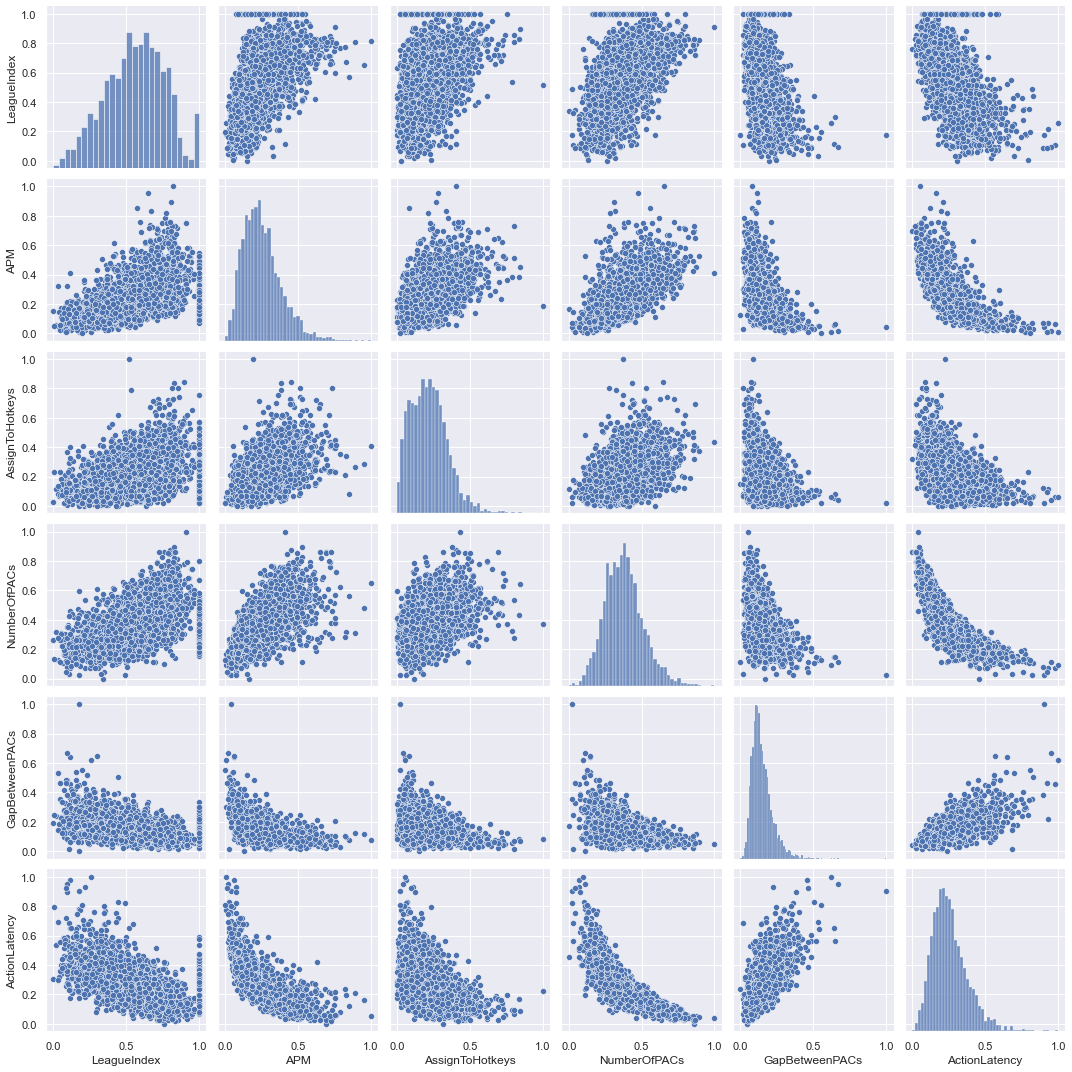

In [36]:
# visualización para lograr inferir algun tipo de relación entre los datos.
cols = ['LeagueIndex','APM','AssignToHotkeys','NumberOfPACs','GapBetweenPACs','ActionLatency']
sns.pairplot(normalized_df[cols],height=2.5)
plt.tight_layout()
plt.show

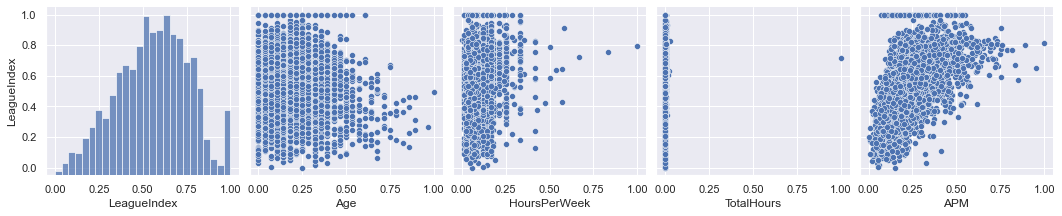

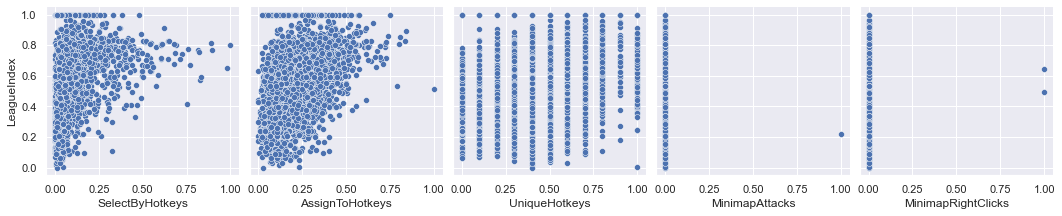

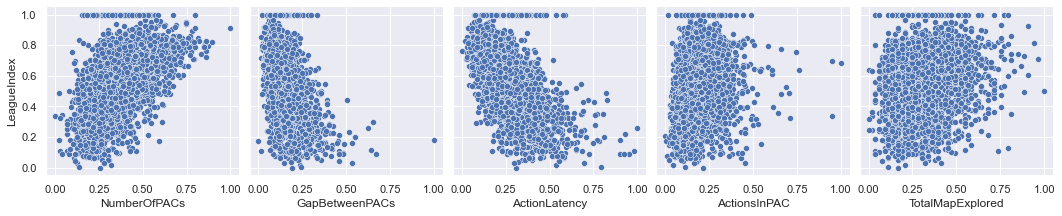

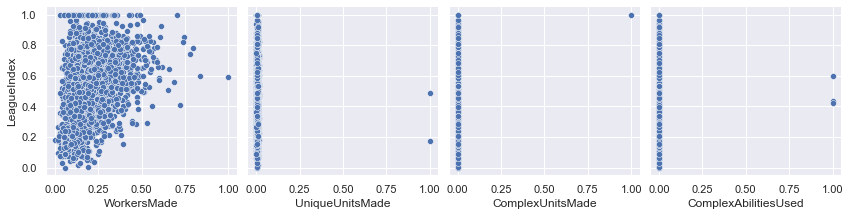

In [37]:
sns.pairplot(normalized_df, height=3, y_vars = 'LeagueIndex', x_vars = normalized_df.columns[0:5], kind='scatter')
sns.pairplot(normalized_df, height=3, y_vars = 'LeagueIndex', x_vars = normalized_df.columns[5:10], kind='scatter')
sns.pairplot(normalized_df, height=3, y_vars = 'LeagueIndex', x_vars = normalized_df.columns[10:15], kind='scatter')
sns.pairplot(normalized_df, height=3, y_vars = 'LeagueIndex', x_vars = normalized_df.columns[15:], kind='scatter')

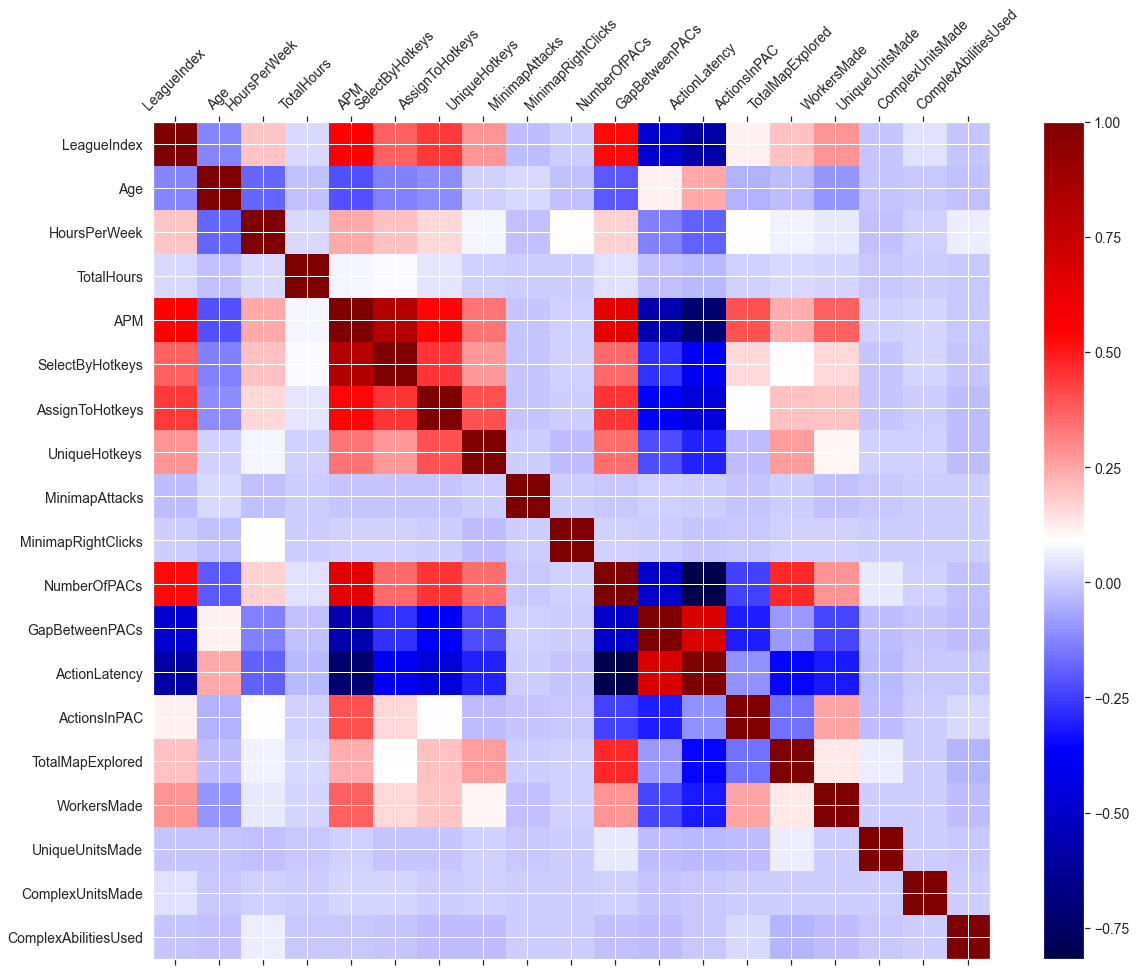

In [38]:
f = plt.figure(figsize=(19, 15))
plt.matshow(normalized_df.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(normalized_df.select_dtypes(['number']).shape[1]), normalized_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(normalized_df.select_dtypes(['number']).shape[1]), normalized_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

## 4.Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *LeagueIndex* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [39]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['APM','AssignToHotkeys','NumberOfPACs', 'GapBetweenPACs','ActionLatency']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [40]:
# Modelo
model = [('model', LinearRegression())]

In [41]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [42]:
# Extraemos las variables explicativas y objetivo para entrenar

X = normalized_df.drop('LeagueIndex', axis = 1)
y = normalized_df['LeagueIndex']
normalized_df_2 = normalized_df.drop('LeagueIndex', axis = 1)

pipeline = pipeline.fit(X,y)

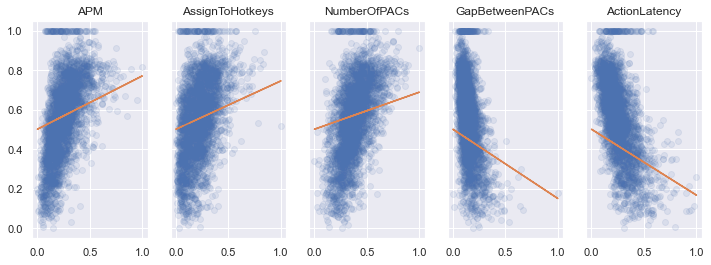

In [43]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

## 5. Exportar e Importar el Modelo 

In [44]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 

['pipeline.joblib']

In [45]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['APM', 'AssignToHotkeys',
                                                   'NumberOfPACs',
                                                   'GapBetweenPACs',
                                                   'ActionLatency'])])),
                ('model', LinearRegression())])

In [46]:
# Clasificamos los datos recientes
normalized_df_2['LeagueIndex'] = p2.predict(normalized_df_2)

<AxesSubplot:xlabel='LeagueIndex', ylabel='Count'>

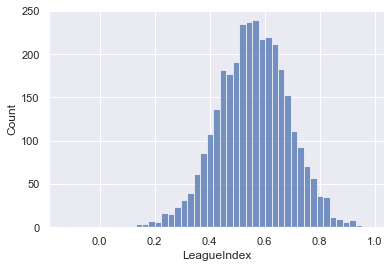

In [47]:
sns.histplot(normalized_df_2['LeagueIndex'])

## 6. Coeficientes

In [48]:
pipeline['model'].coef_

array([ 0.26973439,  0.24429246,  0.18748136, -0.35047164, -0.33348318])

In [49]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,APM,0.269734
1,AssignToHotkeys,0.244292
2,NumberOfPACs,0.187481
3,GapBetweenPACs,-0.350472
4,ActionLatency,-0.333483


In [50]:
normalized_df_2.describe()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3.238000e+03,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3.238000e+03,3.238000e+03,3238.000000
mean,0.202296,0.095104,0.000972,0.253610,0.094472,0.222573,0.434280,3.089457e-04,0.000623,0.379125,0.147379,0.259784,0.196028,0.324880,0.189348,0.006909,3.088611e-04,9.265961e-04,0.557337
std,0.151224,0.071845,0.017583,0.131567,0.110436,0.127902,0.234283,1.757363e-02,0.024849,0.133169,0.074364,0.126022,0.091243,0.140811,0.103417,0.024826,1.757363e-02,3.042902e-02,0.131048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.128598
25%,0.107143,0.047619,0.000297,0.157585,0.029152,0.123769,0.300000,0.000000e+00,0.000002,0.284109,0.097838,0.171328,0.134704,0.226415,0.119922,0.004138,0.000000e+00,0.000000e+00,0.470930
50%,0.178571,0.071429,0.000497,0.233696,0.057554,0.213241,0.400000,4.693706e-08,0.000004,0.371262,0.131555,0.240492,0.184915,0.320755,0.164139,0.005517,0.000000e+00,1.474097e-08,0.560004
75%,0.285714,0.119048,0.000797,0.325114,0.115668,0.300210,0.600000,1.387744e-07,0.000007,0.457775,0.181267,0.324030,0.241961,0.415094,0.234783,0.008276,4.191789e-08,1.275988e-07,0.645657
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.978571


## 7. Métricas de un Modelo

### 7.1 Coeficiente de Determinación $R^2$

In [51]:
p2.score(X,y)

0.4054630525013573

### 7.2 Root-Mean-Square Error (RMSE) 

In [52]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

0.15866313311463295

## 8. Supuestos de la Regresión Lineal

### 8.1 Colinealidad

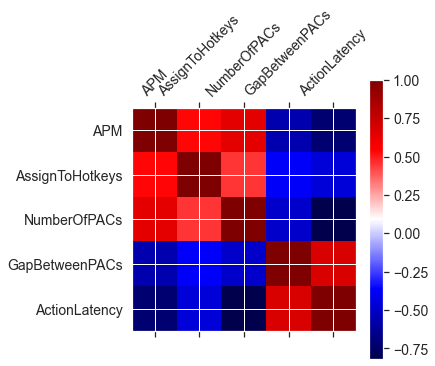

In [53]:
df_temp = normalized_df_2[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

### 8.2 Linealidad

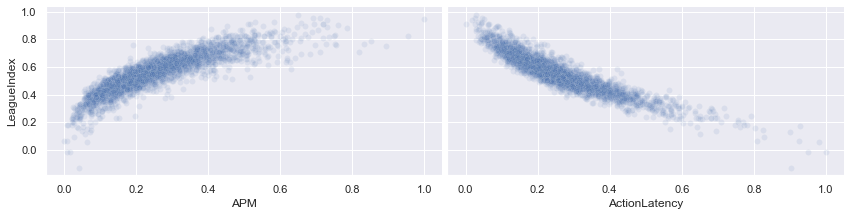

In [54]:
sns.pairplot(normalized_df_2, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['APM','ActionLatency'], kind='scatter', plot_kws = {'alpha':0.1})

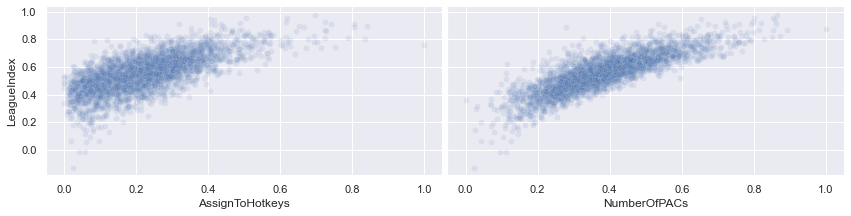

In [55]:
sns.pairplot(normalized_df_2, height=3, aspect = 2, y_vars = 'LeagueIndex', x_vars = ['AssignToHotkeys','NumberOfPACs'], kind='scatter', plot_kws = {'alpha':0.1})

In [56]:
# Revisamos

# Creamos la variable
X = normalized_df_2[['ActionLatency']].copy()
X['ActionLatency_2'] = X['ActionLatency']**2

# columna
col = 'ActionLatency_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

ActionLatency_2: 0.26331857767118316


In [57]:
# Revisamos

# Creamos la variable
X = normalized_df_2[['APM']].copy()
X['APM_2'] = X['APM']**2

# columna
col = 'APM_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

APM_2: 0.2032010287547784


In [58]:

# Revisamos

# Creamos la variable
X = normalized_df_2[['NumberOfPACs']].copy()
X['NumberOfPACs_2'] = X['NumberOfPACs']**2

# columna
col = 'NumberOfPACs_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

NumberOfPACs_2: 0.2408745600331288


In [59]:

# Revisamos

# Creamos la variable
X = normalized_df_2[['GapBetweenPACs']].copy()
X['GapBetweenPACs_2'] = X['GapBetweenPACs']**2

# columna
col = 'GapBetweenPACs_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

GapBetweenPACs_2: 0.15434767761256296


### 8.3 Normalidad en los Errores

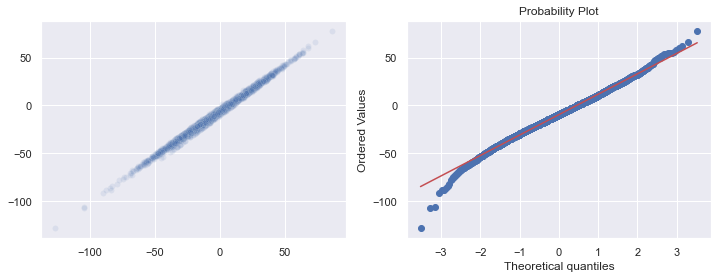

In [60]:
X = df_players.drop('LeagueIndex', axis = 1)
y = df_players['LeagueIndex']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

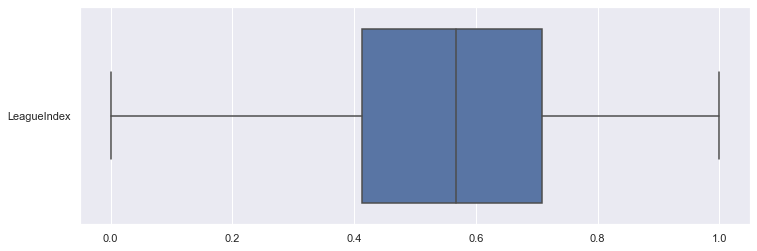

In [61]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= normalized_df[['LeagueIndex']], orient="h")

### 8.4 Varianza Constante (Homocedasticidad)

<AxesSubplot:xlabel='LeagueIndex'>

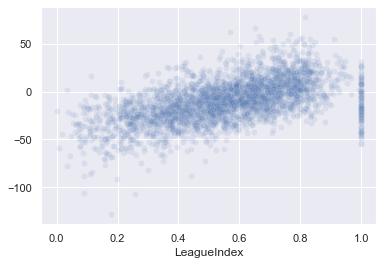

In [62]:
# Visualizamos nuestros datos
sns.scatterplot(data  = normalized_df, x = 'LeagueIndex', y = errors, alpha = 0.1)